<a href="https://www.kaggle.com/code/atripal2029/forest-fire?scriptVersionId=241072744" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Forest Fire in Brazil Data Analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
filepath = "../input/forest-fires-in-brazil/amazon.csv"

amazon = pd.read_csv(filepath, encoding= "iso-8859-1", parse_dates=['date'])

amazon.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
amazon.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [6]:
amazon.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [7]:
amazon.duplicated().sum()

32

In [10]:
amazon = amazon.drop_duplicates()

In [11]:
amazon.shape

(6422, 5)

In [12]:
amazon.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


In [13]:
amazon.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [14]:
# the month name is in portugese, need to convert into english

amazon['month_new'] = amazon['month'].map({'Janeiro':'jan','Fevereiro':'feb','Marco':'march','Abril':'april','Maio':'may','Junho':'jun','Julho':'july','Agosto':'august','Setembro':'sep','Outubro':'oct','Novembro':'nov','Dezembro':'dec'})

In [15]:
amazon.head(10)

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan
5,2003,Acre,Janeiro,10.0,2003-01-01,jan
6,2004,Acre,Janeiro,0.0,2004-01-01,jan
7,2005,Acre,Janeiro,12.0,2005-01-01,jan
8,2006,Acre,Janeiro,4.0,2006-01-01,jan
9,2007,Acre,Janeiro,0.0,2007-01-01,jan


In [18]:
# forest fires vs month

data1 = amazon.groupby('month_new')['number'].sum().reset_index()
data1

,month_new,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,may,34725.363
8,nov,85508.054
9,oct,88681.579


<Axes: title={'center': 'Months v/s Forest fire reported'}, xlabel='month_new', ylabel='number'>

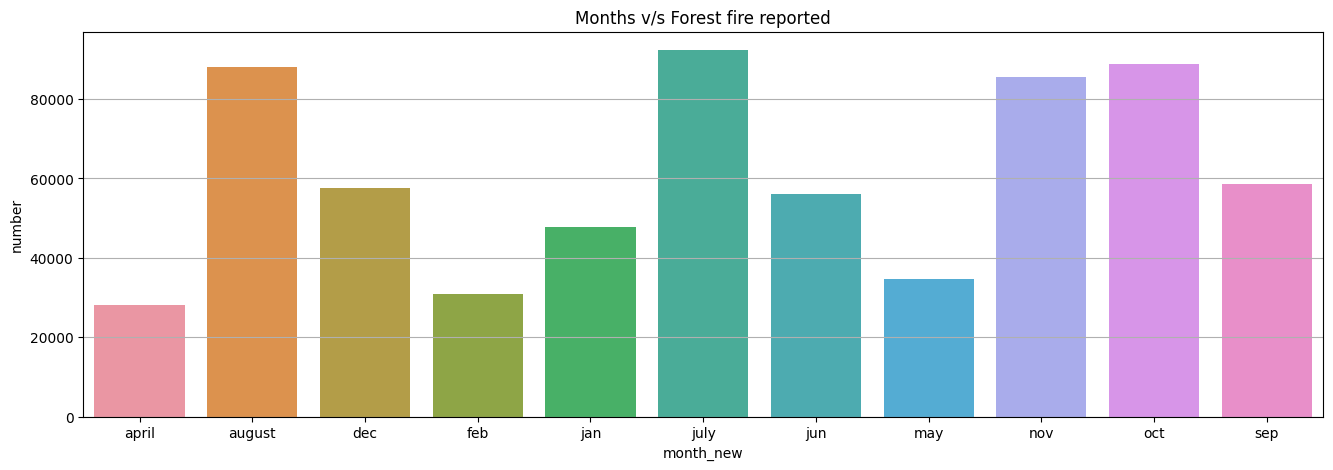

In [27]:
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Months v/s Forest fire reported")
sns.barplot(data=data1, x='month_new', y='number')

In [23]:
data2 = amazon.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: title={'center': 'Years v/s Forest fire reported'}, xlabel='year', ylabel='number'>

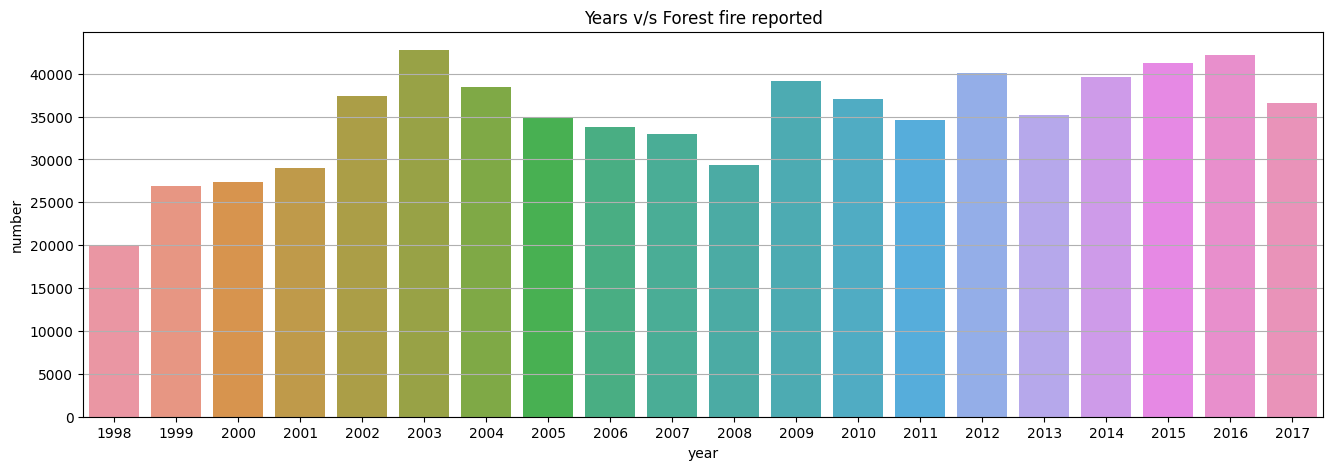

In [26]:
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Years v/s Forest fire reported")
sns.barplot(data=data2, x='year', y='number')

In [30]:
# State v/s fire reported

data3 = amazon.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<Axes: title={'center': 'State v/s Forest fire reported'}, xlabel='number', ylabel='state'>

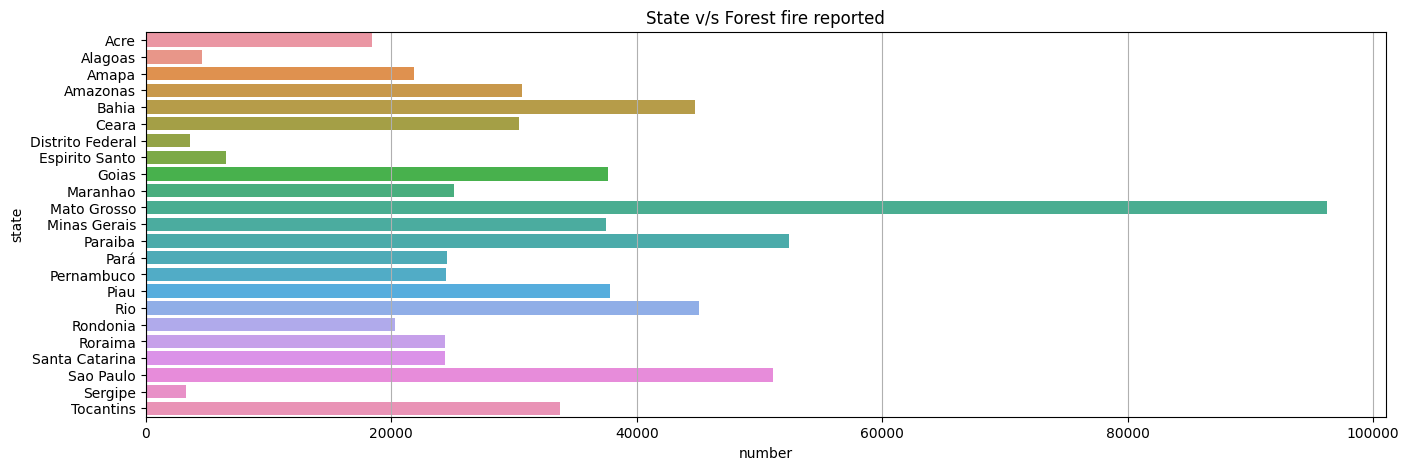

In [32]:
plt.figure(figsize=(16,5))
plt.title("State v/s Forest fire reported")
plt.grid(True)
sns.barplot(data=data3, y='state', x='number')

In [38]:
# Total number of fires reported in amazonas

amazon[amazon['state']=='Amazonas']['number'].sum()

30650.129

In [39]:
# fire reported in amazonas

data4 = amazon[amazon['state']=='Amazonas']
data4

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,dec


In [41]:
data5 = data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: title={'center': 'Number of forest fire reported in Amazonas'}, xlabel='year', ylabel='number'>

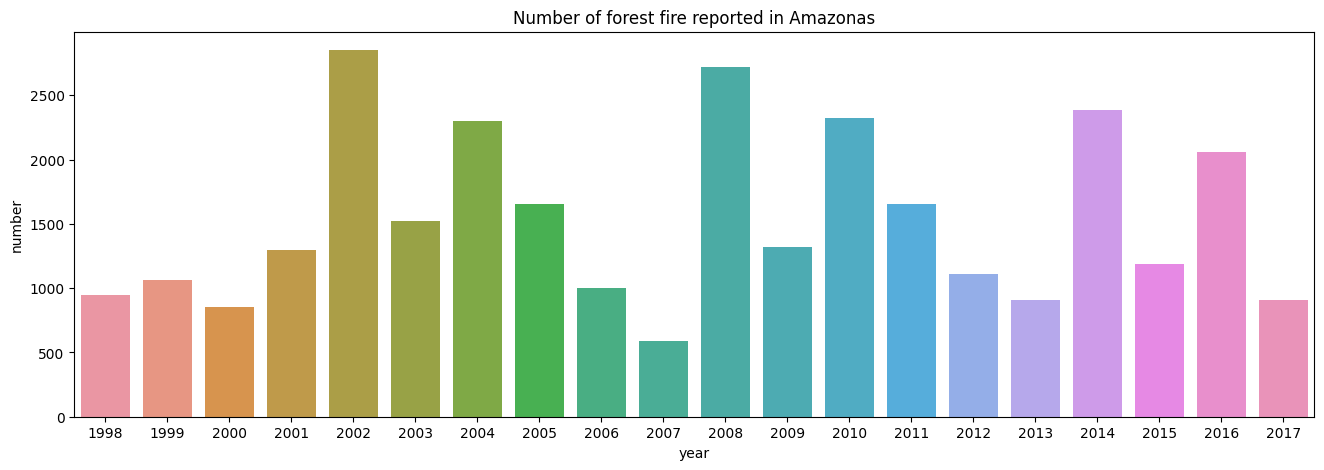

In [42]:
plt.figure(figsize=(16,5))
plt.title("Number of forest fire reported in Amazonas")
sns.barplot(data=data5, x='year', y='number')

In [43]:
data6 = amazon[amazon['state']=='Amazonas']
data6

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,dec


In [45]:
day = data6.groupby(data6['date'].dt.dayofweek).sum().number

import calender

day.index = [calender.day_name[x] for x in range(0,7)]
day = day.reset_index()

day

TypeError: datetime64 type does not support sum operations

In [51]:
# total number of fires reported in 2015 by month

data7 = amazon[amazon['year']==2015].groupby('month_new')['number'].sum().reset_index()
data7

,month_new,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,may,2384.000
8,nov,4034.518
9,oct,4499.525


<Axes: title={'center': 'Forest fire reported in 2015 by months'}, xlabel='month_new', ylabel='number'>

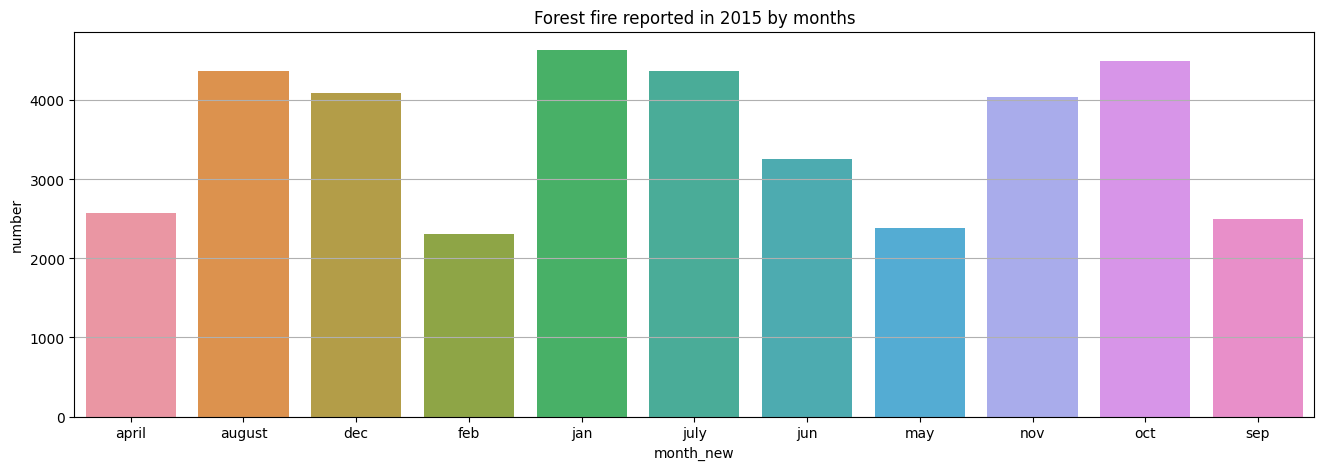

In [55]:
plt.figure(figsize=(16,5))
plt.title("Forest fire reported in 2015 by months")

plt.grid(True)
sns.barplot(data=data7, x='month_new', y='number')

In [57]:
data8 = amazon.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Sao Paulo'),
  Text(1, 0, 'Mato Grosso'),
  Text(2, 0, 'Bahia'),
  Text(3, 0, 'Piau'),
  Text(4, 0, 'Goias'),
  Text(5, 0, 'Minas Gerais'),
  Text(6, 0, 'Tocantins'),
  Text(7, 0, 'Amazonas'),
  Text(8, 0, 'Ceara'),
  Text(9, 0, 'Paraiba'),
  Text(10, 0, 'Maranhao'),
  Text(11, 0, 'Pará'),
  Text(12, 0, 'Pernambuco'),
  Text(13, 0, 'Roraima'),
  Text(14, 0, 'Santa Catarina'),
  Text(15, 0, 'Amapa'),
  Text(16, 0, 'Rondonia'),
  Text(17, 0, 'Acre'),
  Text(18, 0, 'Rio'),
  Text(19, 0, 'Espirito Santo'),
  Text(20, 0, 'Alagoas'),
  Text(21, 0, 'Distrito Federal'),
  Text(22, 0, 'Sergipe')])

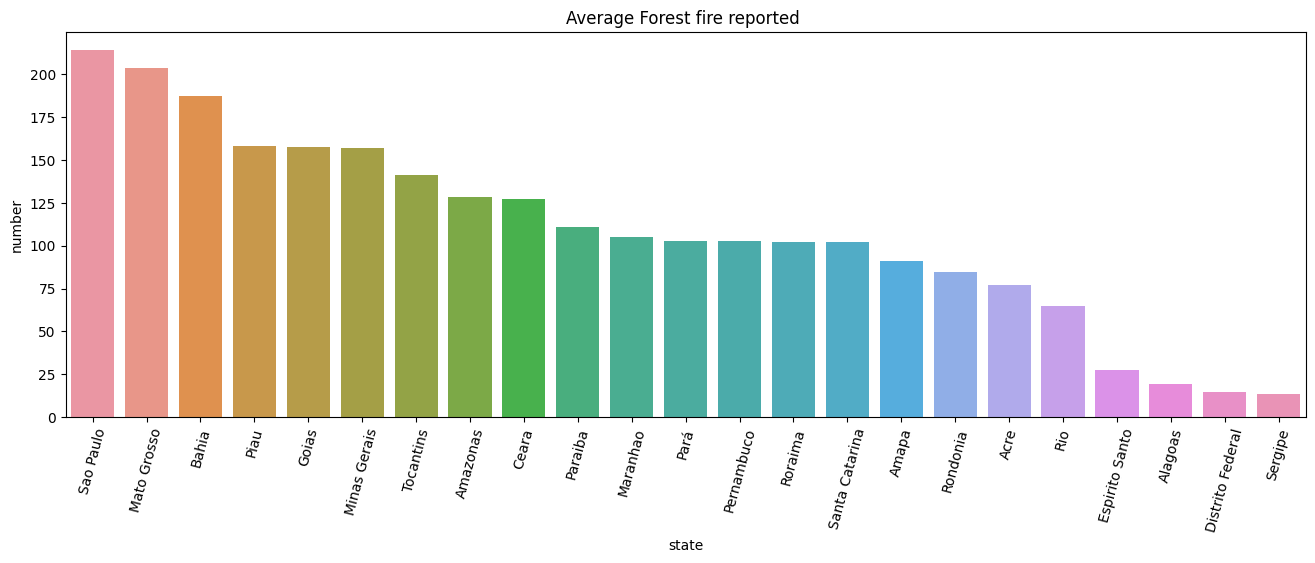

In [60]:
plt.figure(figsize=(16,5))
plt.title("Average Forest fire reported ")

sns.barplot(x='state', y='number', data= data8)
plt.xticks(rotation=75)

In [67]:
amazon[amazon['month_new']=='dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)